# Hello! Welcome to my Spotify Playlist Generator.
### This application will take your Spotify username and favorite genres of music and curate a playlist perfect for your taste. If you do not have a Spotify, or do not wish to participate, I have left the variables necessary to default to my Spotify account and music preferences.

### This application uses the Spotify API, a music.csv file, and a Common Word List txt file to curate the best playlist for your liking. 

### In the cell below are all of the variables you must fill out if you would like to run this application for yourself. Otherwise, if you choose not to change the variables it will curate a playlist for me - yay!

### At this time, the 'playlist' is a list of songs and their artists output to a csv file in your current working directory. The length of the playlists vary based on the genres you listen to, your own Spotify account, etc. How fun!

### I hope you enjoy your new playlist (or mine:))!

In [1]:
# Variables necessary to complete this application for yourself.

# please enter your Spotify username EXACTLY as it is shown on your profile. If you make an error, the program will not work.
SpotifyUsername = 'millshaley'

# please enter your three favorite types of music. The options are as shown (you MUST write them directly as shown. You can also
# copy and paste them if that makes you more comfortable):
# CHOICES FOR FAVORITE TYPES OF MUSIC: 'hip hop', 'dance music', 'alternative rock', 'funk rock', 'indie', 'rock', 'rap'
favTypeOfMusic1 = 'alternative rock'
favTypeOfMusic2 = 'funk rock'
favTypeOfMusic3 = 'indie'

# please choose your all time favorite genre of music from the list below. Many of the songs on your playlist will come from
# this decision.
# CHOICES FOR FAVORITE GENRE: 'hip hop', 'rock', 'indie', 'edm', 'pop'
favGenreOfMusic = 'indie'

In [2]:
# set a variable equal to an empty string to populate later with the chosen playlist genre id
chosenPlaylistID = ''
# these variables are all equal to playlist ids for each of the selected genres.
indiePlaylistID = '37i9dQZF1DWVTKDs2aOkxu'
rockPlaylistID = '37i9dQZF1DX4DZAVUAwHMT'
hiphopPlaylistID = '37i9dQZF1DXbkfWVLd8wE3'
edmPlaylistID = '37i9dQZF1DX3Kdv0IChEm9'
popPlaylistID = '37i9dQZF1DWSVtp02hITpN'

# this if elif else statement is used to determine the chosen playlist id based on the genre that the user selects
if favGenreOfMusic == 'indie':
    chosenPlaylistID = indiePlaylistID
elif favGenreOfMusic == 'rock':
    chosenPlaylistID = rockPlaylistID
elif favGenreOfMusic == 'hip hop':
    chosenPlaylistID = hiphopPlaylistID
elif favGenreOfMusic == 'edm':
    chosenPlaylistID = edmPlaylistID
else:
    chosenPlaylistID = popPlaylistID
chosenPlaylistID

'37i9dQZF1DWVTKDs2aOkxu'

# Spotify API pull

I used the Spotify for Developers console as an assistant to pulling my requests. The page is found here: https://developer.spotify.com/console/

In [3]:
# these are my spotify api credentials to use to retrieve the tokens for my api requests
myKey = '80c2d9fceb8d479fb353d9f62b14533b'
myID = 'bb8264b69b1a4234b2c49b9b8772dd7a'

In [4]:
# importing requests to be able to make json api requests
import requests

In [5]:
# My knowledge of how the credentials, id, and key work come from this documentation of the Spotify API:
# https://stmorse.github.io/journal/spotify-api.html
# The POST requests require a body, which is where my credentails, id, and key come into play. The POST request is more secure
# than the GET request, therefore this is the form of request I used to get my access token.

# setting a variable equal to the authorization URL to be able to get my api access token
authURL = 'https://accounts.spotify.com/api/token'

# creating a variable equal to the request that will allow me to get my access token using my credentials
getToken = requests.post(authURL, {
    'grant_type': 'client_credentials',
    'client_id': myID,
    'client_secret': myKey,
}).json()

# setting a variable equal to my access token
accessToken = getToken['access_token']

In [6]:
# setting headers equal to a dictionary that holds my access token
headers = {
    'Authorization': 'Bearer {token}'.format(token=accessToken)
}

In [7]:
# creating a base url so that I do not have to reenter this in every request I make
baseURL = 'https://api.spotify.com/v1/'

In [8]:
# setting a variable equal to the playlists on mine (or the user's) profile
myProfile = requests.get(baseURL + 'users/' + SpotifyUsername + '/playlists', headers=headers).json()

In [9]:
# creating an empty list to append the urls to each of these playlists to the list later
allPlaylistURLs = []
# creating an empty list to append the artists of each of the songs in the playlist to the list later
artName = []
# iterating through the playlists in my profile
for playlist in myProfile['items']:
    # appending the urls to a list
    allPlaylistURLs.append(playlist['tracks']['href'])
# iterating through the playlist urls 
for playlist in allPlaylistURLs:
    # setting a variable equal to the songs in the playlists
    tracks = requests.get(playlist, headers=headers).json()
    # iterating through the artists in the tracks
    for artist in tracks['items']:
        # appending the list of artists to the artName list
        artName.append(artist['track'])

In [10]:
# creating an empty list to append the songs to
songList = []
# creating an empty list to append the artists to
artistList = []
# iterating through the artName list
for elem in artName:
    # finding the elements that do not equal None
    if elem != None:
        # appending these elements to the songList list
        songList.append(elem['artists'])
# iterating through the artists in the songList
for artist in songList:
    # appending the artist ID to the artistList
    artistList.append(artist[0]['id'])
# removing duplicates from the list by changing it to a set
artistList = set(artistList)
# setting it back equal to a list to make iterating possible
artistList = list(artistList)

In [11]:
# creating an empty list to populate with related artists to the artists the user already listens to 
similarArtists = []
# iterating through the artistIDs in the artistList
for artistID in artistList:
    # requesting the related artists through the Spotify API using the artist IDs and appending them to the similarArtists list
    similarArtists.append(requests.get(baseURL + 'artists/' + str(artistID) + '/related-artists', headers=headers).json())

In [12]:
# creating an empty list to populate with the similar artist IDs
similarIDs = []
# creating an empty list to populate with the similar artist names
similarNames = []
# iterating through the artists in the similar artists list
for artist in similarArtists:
    # finding the artists that do not have an error
    if artist.keys() != {'error'}:
        # finding the artists that do not have an empty list as their values in the key value pair
        if artist['artists'] != []:
            # appending the ids to the similarIDs list
            similarIDs.append(artist['artists'][0]['id'])
            # appending the names to the similarNames list
            similarNames.append(artist['artists'][0]['name'])

In [13]:
# creating an empty list to populate with the top songs from each similar artist
topSongsSimilarArtists = []
# iterating through the artist IDs in the similarIDs list
for artistID in similarIDs:
    # requesting the top tracks from those artists and appending them to the topSongsSimilarArtists list
    topSongsSimilarArtists.append(requests.get(baseURL + 'artists/' + artistID + '/top-tracks?market=ES', headers=headers).json())


In [14]:
# setting the topSongsSimilarArtists list to just the 1st through 24th element to shorten the list of songs to reasonable length
topSongsSimilarArtists = topSongsSimilarArtists[1:24]
# creating an empty list to populate with the songs for the playlist
songsForPlaylist = []
# iterating through the artists in topSongsSimilarArtists
for artist in topSongsSimilarArtists:
    # appending the artists' top tracks to the songsForPlaylist list
    songsForPlaylist.append(artist['tracks'])

In [15]:
# creating an empty list to populate with the names of the songs in the songsForPlaylist list
songList = []
# creating an empty list to populate with the artists of the songs in the songsForPlaylist list
artistNameList = []
# creating an empty dictionary to populate with the names and artists of the songs in songsForPlaylist as key/value pairs
songAndArtist = {}
# iterating through the songs in the songsForPlaylist list
for song in songsForPlaylist:
    # finding the songs that do not equal an empty list
    if song != []:
        # appending the song names to the songList list
        songList.append(song[0]['name'])
        # appending the artist names to the artistNameList
        artistNameList.append(song[0]['album']['artists'][0]['name'])
        # setting the songAndArtist keys to the names and the values to the artists 
        songAndArtist[song[0]['name']] = song[0]['album']['artists'][0]['name']

# Music.csv pull

In [16]:
# music.csv file found here: https://corgis-edu.github.io/corgis/csv/music/

# importing pandas to create a df, use the functions, and then use to export csv files
import pandas as pd
# creating a dataframe equal to reading in the music csv file
musicDF = pd.read_csv('music.csv')
# setting a new dataframe equal to the original data frame except only pulling artists that fall into the users favorite genres
musicDFFixed = musicDF.loc[((musicDF['artist.terms'] == favTypeOfMusic1) | (musicDF['artist.terms'] == favTypeOfMusic2) | (musicDF['artist.terms'] == favTypeOfMusic3))]
# setting a variable equal to a set of the dataframe's artist names to get rid of duplicates
artistMusic = set(musicDFFixed['artist.name'])
# setting it back to a list to make iterating possible
artistMusic = list(artistMusic)

In [17]:
# creating an empty list to populate with the artist names except instead of a space using a + sign to make it possible to
# search for the artists in the Spotify API
artistMusicReq = []
# iterating through the artists in the artistMusic list
for artist in artistMusic:
    # replacing the artist name spaces with + signs. The reason being is that in order to search for an artist, you must search
    # for each part of their name without spaces in order for the request to function properly
    artist = artist.replace(' ','+')
    # appending the newly replaced artists to the artistMusicReq list
    artistMusicReq.append(artist)

In [18]:
# creating an empty list to populate with the artists that I searched for from the music csv file
musicArtistsCall = []
# iterating through the artists in the artistMusicReq list
for artist in artistMusicReq:
    # requesting the artists that match the names in the artistMusicReq list and appending them to the musicArtistsCall list
    musicArtistsCall.append(requests.get(baseURL + 'search?q=' + artist + '&type=artist', headers=headers).json())

In [19]:
# creating an empty list to populate with the IDs of the artists we found in the musicArtistsCall
musicIDs = []
# iterating through the artists in the musicArtistsCall list
for artist in musicArtistsCall:
    # finding the artist items that do not equal an empty list
    if artist['artists']['items'] != []:
        # appending the artist IDs to the musicIDs list
        musicIDs.append(artist['artists']['items'][0]['id'])

In [20]:
# creating an empty list to populate with the top songs from the artists found in the music csv file
topSongsMusic = []
# iterating through the artistIDs in the musicIDs list
for artistID in musicIDs:
    # requesting the artists' top tracks and appending them to the topSongsMusic list
    topSongsMusic.append(requests.get(baseURL + 'artists/' + artistID + '/top-tracks?market=ES', headers=headers).json())

In [21]:
# creating an empty list to populate with the songs for the playlist from the music csv artists and their top songs on Spotify
musicSongsForPlaylist = []
# iterating through the artists in the topSongsMusic list
for artist in topSongsMusic:
    # appending the artists' top tracks to the musicSongsForPlaylist list
    musicSongsForPlaylist.append(artist['tracks'])
# creating an empty list to populate with the top songs from the artists in the music csv file    
musicSongList = []
# creating an empty list to populate with the artist names from the music csv file
musicArtistNameList = []
# creating an empty dictionary to populate with the artist songs and names as key value pairs
musicSongAndArtist = {}
# iterating through the songs in the musicSongsForPlaylist list
for song in musicSongsForPlaylist:
    # finding where the song is not equal to the value of an empty list
    if song != []:
        # appending the song name to the musicSongList
        musicSongList.append(song[0]['name'])
        # appending the artist name to the musicArtistNameList
        musicArtistNameList.append(song[0]['album']['artists'][0]['name'])
        # setting the keys of the musicSongAndArtistDictionary equal to the song name and the values equal to the artist name
        musicSongAndArtist[song[0]['name']] = song[0]['album']['artists'][0]['name']

In [22]:
# updating the songAndArtist playlist with the musicSongAndArtist songs and artists as well
songAndArtist.update(musicSongAndArtist)

# Common Word List txt file pull and Spotify Chosen Playlist pull

In [23]:
# This list of common words is found here: https://gist.github.com/deekayen/4148741
# importing csv to open the CommonWordList txt file
import csv
# importing re to use regex to replace any non word or space character with a space
import re
# setting commonWordList equal to an empty string to populate with the rows of the common word list text file
commonWordList = ''
# opening the CommonWordList txt file
with open('CommonWordList.txt','r') as commonWords:
    # reading the file
    wordReader = csv.reader(commonWords)
    # iterating through the rows in wordReader
    for row in wordReader:
        # setting the row equal to a string
        row = str(row)
        # making the empty string commonWordList += the rows it is iterating through
        commonWordList += row
        # adding an empty string after each word so that there is a space between each word
        commonWordList += ''
# use regex to replace any non word or space character with a space (^ means not, \w means word character, and \s means 
# space character so the entire string is saying any NON (^) word character (\w) or space (\s), replace with a space)
commonWordList = re.sub('[^\w\s]',' ',commonWordList)
# splitting the string on spaces to create a list of each individual word as an individual element of the list
commonWordList = commonWordList.split()

In [24]:
# setting a variable equal to pulling the playlist associated with the user's chosen genre 
chosenPlaylist = requests.get(baseURL + 'playlists/' + chosenPlaylistID + '/tracks',headers=headers).json()

In [25]:
# creating an empty list to populate with the song names of the user's chosen playlist
chosenMusic = []
# creating an empty list to populate with the artist names of the user's chosen playlist
chosenArtists = []
# creating an empty list to populate with the song name and artist of the user's chosen playlist as key,value pairs
chosenSongAndArtist = {}
# iterating through the songs in the chosen playlist
for song in chosenPlaylist['items']:
    # finding where the track does not equal None
    if song['track'] != None:
        # appending the song names to the chosenMusic list
        chosenMusic.append(song['track']['name'])
        # appending the artist names to the chosenArtist list
        chosenArtists.append(song['track']['artists'][0]['name'])
        # setting the keys of chosenSongAndArtist equal to the song name and the values equal to the corresponding artist
        chosenSongAndArtist[song['track']['name']] = song['track']['artists'][0]['name']
# creating an empty list to populate with the chosen songs
chosenSongs = []
# iterating through the songs in the chosenMusic list
for song in chosenMusic:
    # iterating through the words in the commonWordList list
    for word in commonWordList:
        # finding if the word is in the song
        if word in song:
            # if it is, append the song to the chosenSongs list
            chosenSongs.append(song)
# set the chosenSongs equal to the set version of the list to remove duplicates
chosenSongs = set(chosenSongs)
# set it back to the list to make iterating possible
chosenSongs = list(chosenSongs)

In [26]:
# update the songAndArtist dictionary with the chosenSongAndArtist dictionary
songAndArtist.update(chosenSongAndArtist)

In [27]:
# THIS CELL IS SIMPLY TO SHOW THE USER THE SONGS AND ARTISTS THAT WILL BE IN THEIR CSV FILE
# iterate through the songs and their artists within the songAndArtist items
for song,artist in songAndArtist.items():
    # print the song name
    print('Song name: ' + str(song))
    # print the artist
    print('Artist: ' + str(artist))

Song name: Moving On
Artist: Sarah and the Sundays
Song name: Strong
Artist: London Grammar
Song name: Hey, Ma - triple j Like A Version
Artist: The Vanns
Song name: Hotel in Minsk
Artist: jonatan leandoer96
Song name: After School Sad Session
Artist: Nadhif Basalamah
Song name: Yer Killin' Me
Artist: Remo Drive
Song name: Brazil
Artist: Declan McKenna
Song name: Hands On Ya Knees (feat. Kevin Gates)
Artist: Renni Rucci
Song name: You Are the Woman
Artist: Firefall
Song name: Little Ladder to Heaven
Artist: Chris Lynch
Song name: I Love Being Tired
Artist: Noah Chenfeld
Song name: Lou's Tune
Artist: DARGZ
Song name: Drunk And Nasty (feat. Sharc)
Artist: Pi’erre Bourne
Song name: Girls In Bikinis
Artist: Poppy
Song name: >one - greater than one
Artist: VALORANT
Song name: Orpheus Under the Influence
Artist: The Buttertones
Song name: Greek Tragedy - Oliver Nelson TikTok Remix
Artist: The Wombats
Song name: Televised
Artist: HUNNY
Song name: Faded
Artist: Crypto
Song name: When I Get Hom

In [28]:
# creating a dataframe equal to the songAndArtist dictionary items and creating the column titles 'Song' and 'Artist'
songAndArtistDF = pd.DataFrame(songAndArtist.items(),columns=['Song','Artist'])
# writing the dataframe to a csv file called 'PythonPlaylist_{users spotify name}' with no index
songAndArtistDF.to_csv('PythonPlaylist_' + SpotifyUsername + '.csv',index=False)

## Your playlist is complete! Please see your playlist within your current working directory under the title 'PythonPlaylist_YourSpotifyUsername.csv'

# Visualizations

My first visualization is the graph of the most common genres of the user's similar artists. I thought it would be interesting to know how much people know about their own music taste. I pulled the similar artists' genres from their spotify accounts to see what genres their music actually falls into.

My second and third visualizations are the 10 least popular and 10 most popular artists that fall within the user's similar artists. These graphs reflect the disparity in popularity and genre. 

Here is what I found:

The user selected alternative rock, funk rock, and indie as their favorite types of music.
The user selected indie as their all time favorite genre. Here are the genres of music they actually listen to.


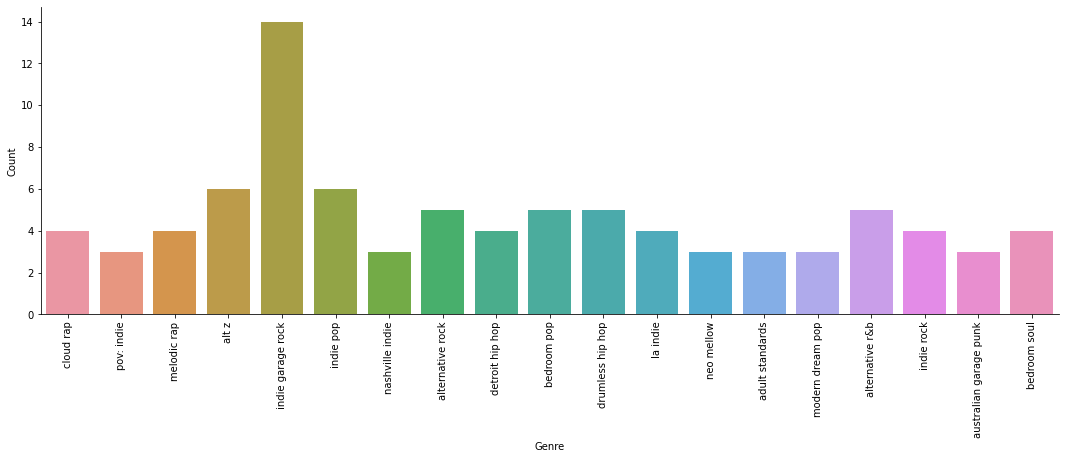

In [29]:
# create an empty list to populate with the genres that the user listens to most
visualizeGenres = []
# create an empty dictionary to populate with the genres the artist listens to and their counts of instances
genreCounts = {}
# create an empty dictionary to populate with the most frequent genres the artist listens to
genreCountsMax = {}
# iterate through the artists in similarArtists
for artist in similarArtists:
    # find where the artists do not equal an empty list
    if artist['artists'] != []:
        # find where the genres do not equal an empty list
        if artist['artists'][0]['genres'] != []:
            # append the genres to the visualizeGenres list
            visualizeGenres.append(artist['artists'][0]['genres'][0])
# iterate through the genres in the visualizeGenres list
for genre in visualizeGenres:
    # if the genre already exists within the genreCounts list, add one to its value
    if genre in genreCounts:
        genreCounts[genre] += 1
    # if it does not already exist, make its value one
    else:
        genreCounts[genre] = 1
# iterate through the keys and values within the genreCounts items
for genre,count in genreCounts.items():
    # find where the value count is greater than 2
    if count > 2:
        # append the genre and its count to the genreCountsMax dictionary as key value pairs
        genreCountsMax[genre] = count
# make a dataframe from the genreCountsMax dictionary items and make the column names 'Genre' and 'Count'
genreCountsMaxDF = pd.DataFrame(genreCountsMax.items(),columns=['Genre','Count'])
# import seaborn to create a plot of the genres versus their counts
import seaborn as sb
# print the three types of music the user selected as their favorite
print('The user selected ' + favTypeOfMusic1 + ', ' + favTypeOfMusic2 + ', and ' + favTypeOfMusic3 + ' as their favorite types of music.')
# print the user's all time favorite genre
print('The user selected ' + favGenreOfMusic + ' as their all time favorite genre. Here are the genres of music they actually listen to.')
# create a plot using sb.catplot of the genres along the x axis and their counts along the y axis. Rotate the xticklabels so
# that the names of the genres do not overlap. set the aspect to 3 so that the graph is large and easy to see.
genreSpread = sb.catplot(x="Genre",y="Count",data=genreCountsMaxDF,kind="bar",aspect=3).set_xticklabels(rotation=90)
genreSpread

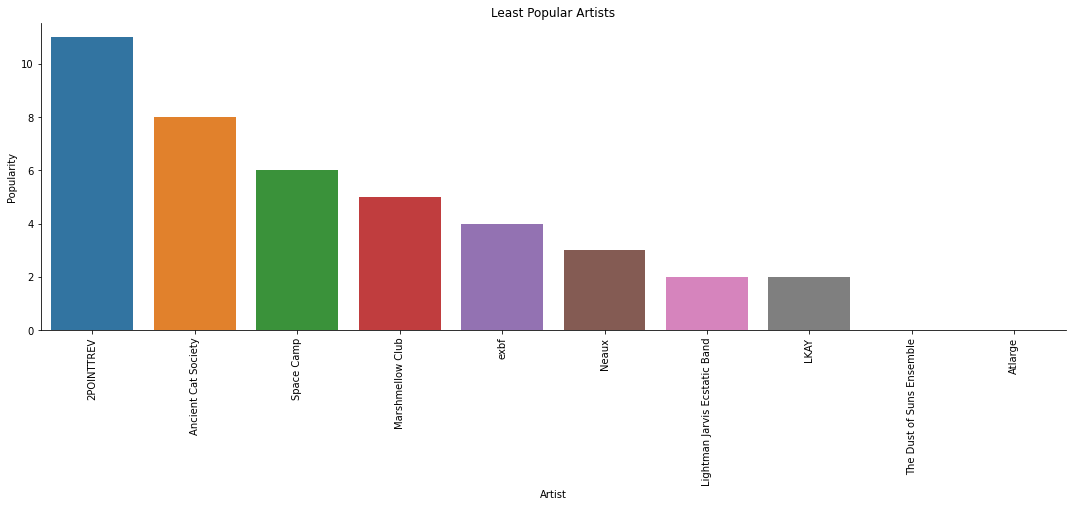

In [30]:
# create an empty dictionary to populate with artist name and popularity score as key,value pairs
artistPopularity = {}
# iterate through the artists in similarArtists
for artist in similarArtists:
    # find where artist['artists'] is not equal to an empty list value
    if artist['artists'] != []:
        # make the artistPopularity keys the names of the artists and the values the popularity scores
        artistPopularity[artist['artists'][0]['name']] = artist['artists'][0]['popularity']
# ***I took the import sortdictionary from the sortdictionary.py file found under the 'Homework' section of our modules
import sortdictionary
# create a new dictionary equal to your sorted dictionary in descending order
sortedartistPopularity = sortdictionary.sortDictionaryByValues(artistPopularity,ascending=False)
# create a dataframe containing the items from your sorted dictionary with the column names being 'Artist' and 'Popularity'
artistPopularityDF = pd.DataFrame(sortedartistPopularity.items(),columns=['Artist','Popularity'])
# create a leastPopularDF and set it equal to the last 10 rows in your dataframe (.tail(10))
leastPopularDF = artistPopularityDF.tail(10)
# create a mostPopularDf and se4t it equal to the first 10 rows in your dataframe (.head(10))
mostPopularDF = artistPopularityDF.head(10)
# create a plot using sb.catplot and set the x values equal to artist, the y values equal to popularity score, the data equal
# to your least popular dataframe, the aspect set to 3 for better visualization, and rotate the xticklabels 90 degrees for 
# readability. Then set your title equal to 'Least Popular Artists'
leastPopular = sb.catplot(x="Artist",y="Popularity",data=leastPopularDF,kind="bar",aspect=3).set_xticklabels(rotation=90).set(title='Least Popular Artists')
# call the plot
leastPopular

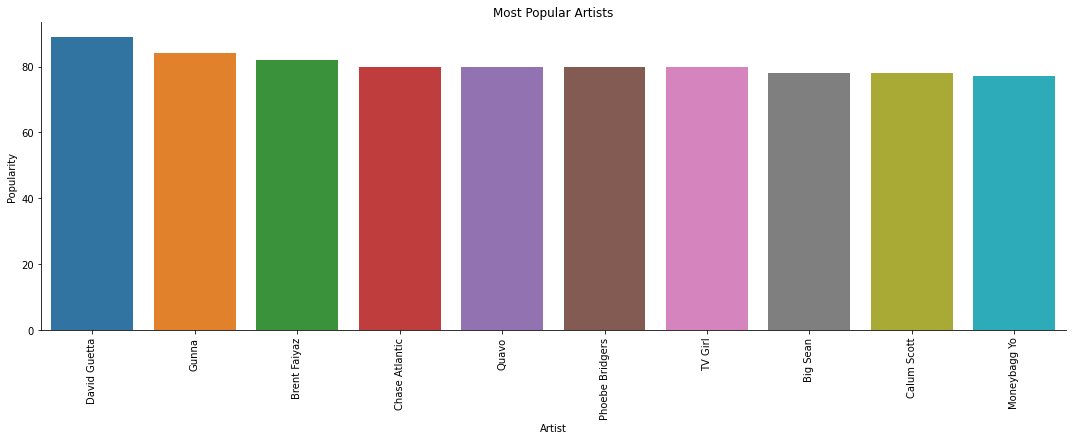

In [31]:
# create a plot using sb.catplot and set the x values equal to artist, the y values equal to popularity score, the data equal
# to your most popular dataframe, the aspect set to 3 for better visualization, and rotate the xticklabels 90 degrees for 
# readability. Then set your title equal to 'Most Popular Artists'
mostPopular = sb.catplot(x="Artist",y="Popularity",data=mostPopularDF,kind="bar",aspect=3).set_xticklabels(rotation=90).set(title='Most Popular Artists')
# call the plot
mostPopular

# Writeup

**The scope of my project was to curate a Spotify playlist based upon the user's favorite genres and similar artists to the artists they already listen to within Spotify**. My program uses the Spotify API to take the artists of those songs, find similar artists, and add their top songs to the playlist. Similar artists pulls will vary each time the program is written so, if you wanted, you could run the program multiple times and get a slightly different playlist each time. This code also uses a music.csv file containing artists from all different decades and different genres. **As a part of the project, the user selects their top three genres and will get a list of artists from those genres from the music.csv file**. My program will then search through Spotify for those artists and find their top songs. The third and final pull of my program incorporates an already made Spotify playlist and a common word list text file to add the final songs to the playlist. My idea behind this was to incorporate a slightly more fun/less algorithmic approach to adding songs so that the user was able to slightly branch out of their normal music taste. I ask the user to input their favorite genre, then the playlist that I pull is one with music only from that genre. I then compare the title of the songs to the common word list and if the words exist in both the title and the common word list, I add that song to the playlist. My final step in this project is to export the playlist of songs and their artists to a csv file called 'PythonPlaylist.csv' that will be stored in their current working directory. 

My project plan initially included two different types of data: a list of artists that performed at a theater in Boulder in 2022 and a text file of lyrics to my favorite song. My goal for the list of artists was to iterate through the genres of these artists and if they matched one of my top three favorite genres, I would pull their top songs and add them to the playlist. I decided against this route because I could not find a public dataset containing said list of artists, and decided that pulling music from many different decades would create a more diverse playlist for myself and other users. My idea for the text file of lyrics to my favorite song was to pull the lyrics, remove the words that were in the common words list csv, then find the most frequent uncommon word in the song. I would then search through Spotify and find 10 songs that have a high frequency of this word as well and add them to my playlist. I was originally deterred from this because I discovered that the word 'maybe' was not in the common word list, so I did not have faith in the originality of words. I was also turned away from this idea because common uncommon words do not dictate a similar music style and I did not believe that this would fit with the goal of my program. Finally, I was turned away from this because the Spotify API does not have a way to use song lyrics to find a song. Instead of doing this, I decided to use the already created Spotify genre playlists and my common words list to add additional songs to my playlist. 

The results of this project were definitely better than I expected, but as I continued on, I found myself disappointed. I was able to push myself to write code that I was not as comfortable with; but once I overcame that initial push, I was disappointed that I could not do more. I was delighted with the success of the project up until the very end. My code ran beautifully, the playlists that were outputted were wholly geared towards my music taste (as well as my roommates music taste, whose Spotify and music taste information I used to curate a playlist for her). The only thing that I could not accomplish - which, to me, is arguably the most important part of this project - was uploading the created playlists to Spotify. After sifting through pages and pages of documentation, I attempted to use a json 'post' request to allow me to create a new playlist on my Spotify account. I quickly came to realize that my request was always 'not found', and the 404 error codes were disappointing. 

What I am pleasantly surprised about was how well I knew my music taste. I found through my visualizations that my favorite genres that I manually input into the program happened to fall almost seamlessly within the categories that were depicted in my first visualization. Interestingly enough, the '2022 Spotify Wrapped' showing my top five most played genres came out prior to my completion of this project, and my most common genres were all either exactly my most played genres or fell within subcategories of those genres. It was very appealing to see how well the algorithm of my program tailored to my music taste. Overall, the results of this project were fairly close to what I had expected, and I am very excited to have new music to add to my Spotify account.

If I were to continue to work on this project, I would add more genres to the list of genres the user may input into the program and I would figure out how to actually post the playlist to Spotify. The genres I chose for the user to pick from are limited due to the timeframe I had to complete this project, and I know that those genres are not everyone's cup of tea. If I had more time, I would alter my program to be able to accept all music genres and subgenres. My inability to post the playlist to Spotify has everything to do with lack of time and experience, and if I had more of both, I would be able to post the playlist to Spotify. If the user's end goal was to actually curate the playlist and add it to their Spotify account (which is my goal), using the csv file and copying every single song into Spotify makes this a very time consuming process. 